In [1]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1221, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 1221 (delta 229), reused 205 (delta 196), pack-reused 932
Receiving objects: 100% (1221/1221), 72.46 MiB | 3.09 MiB/s, done.
Resolving deltas: 100% (486/486), done.


In [2]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2023-12-28 08:42:23--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 108.138.51.26, 108.138.51.41, 108.138.51.8, ...
Connecting to huggingface.co (huggingface.co)|108.138.51.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1704004943&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNDAwNDk0M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2

In [3]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

     |████████████████████████████████| 78 kB 1.6 MB/s eta 0:00:011
     |████████████████████████████████| 11.7 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 19.7 MB 4.3 MB/s eta 0:00:011
     |████████████████████████████████| 611 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 330 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 7.5 MB/s eta 0:00:011
     |████████████████████████████████| 305 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 399 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 996 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 341 

In [4]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

--2023-12-28 08:43:18--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg’

dog.jpg             100%[===================>]  97.51K  --.-KB/s    in 0.06s   

2023-12-28 08:43:18 (1.69 MB/s) - ‘images/dog.jpg’ saved [99846/99846]



In [5]:
import matplotlib.pyplot as plt
import cv2

In [6]:
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

800 534


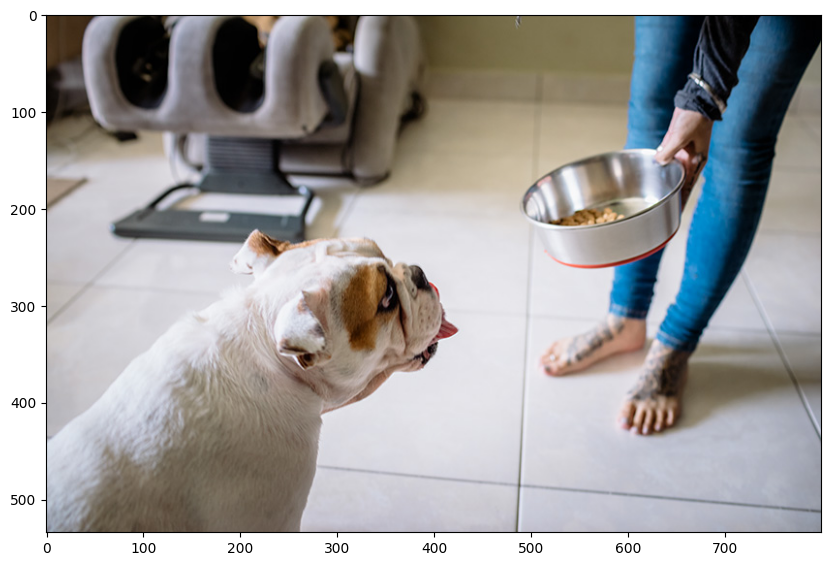

In [7]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

"--imgsz 1024" means the input image size is 1024. Our model was trained on a size of 1024. You can change it to any size you want to input. Using other sizes would produce different segmentation results.

In [12]:
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/dog.jpg --imgsz 1024

In [13]:
image = cv2.imread('output/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

[ WARN:0@1511.693] global loadsave.cpp:248 findDecoder imread_('output/dog.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
